In [1]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import json
from collections import defaultdict

In [2]:
base_dir = '/shared/2/projects/framing/'
user_ideology_file = os.path.join(base_dir,'data','user-ideology-04-11.txt')
tweet_ideology_file = os.path.join(base_dir,'data','tweet-ideology-04-11.txt')
mfc_frames_file = os.path.join(base_dir,'intermediate_results','mfc_labeled_frames_topn200_minwords2.tsv')

In [3]:
frames_df = pd.read_csv(mfc_frames_file,sep='\t',index_col=0)
ideology_df = pd.read_csv(tweet_ideology_file,sep='\t',index_col=0)
combined_df = pd.merge(frames_df, ideology_df, left_on='tid', right_on='tweet_id')

/opt/anaconda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [15]:
mfc_pmi_lexicon_file = "/shared/2/projects/framing/data/pmi_mfc_intersect_thresh_50.json"
pmi_lexicon = defaultdict(list)
with open(mfc_pmi_lexicon_file,'r') as f:
    pmi_lexicon_full = json.load(f)
for frame in pmi_lexicon_full:
    if frame not in ['None','Other']:
        words = [x[0] for x in pmi_lexicon_full[frame][:200]]
        pmi_lexicon[frame] = words
pd.DataFrame(pmi_lexicon)

,"Legality, Constitutionality, Jurisdiction",Quality of Life,Cultural Identity,Morality,Public Sentiment,Political,Economic,Capacity and Resources,Policy Prescription and Evaluation,Crime and Punishment,Health and Safety,Fairness and Equality,Security and Defense,External Regulation and Reputation
0,justices,dreams,culture,moral,demonstrators,boehner,economy,shortage,deferred,sentenced,injured,fairness,hijackers,vicente
1,circuit,separated,film,catholic,marched,mitt,billion,backlog,childhood,probation,aids,unfairly,terrorist,fox
2,court's,happy,heritage,god,poll,re-election,wages,capacity,policy,arrested,died,racism,troops,israel
3,supreme,quality,ellis,church,protesters,republicans,cost,resources,e-verify,convictions,hospital,unfair,terrorists,mexico's
4,ruled,mother,cultural,faith,rally,party's,low-skilled,cap,guidelines,conspiracy,heat,discrimination,terrorism,relations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,determine,dreamers,institute,community,positive,administration's,welfare,documented,obvious,trial,fast,promote,legitimate,priority
196,entitled,becoming,yorkers,goes,phoenix,enact,force,problems,ideas,victims,coast,activist,near,crisis
197,warrant,store,understanding,responsible,pennsylvania,vice,housing,train,permits,assistant,behavior,earned,primarily,convention
198,gonzalez,feared,play,juan,santa,oppose,analysis,october,recipients,witnesses,struck,following,johnson,admit


In [17]:
frames_df

,year,country,tid,frame
0,2011,CA,150966729227505664,None
1,2011,CA,122194592371195905,None
2,2011,CA,134802149925322752,None
3,2011,CA,124656052988952576,Quality of Life
4,2011,CA,116612078655115264,None
...,...,...,...,...
8054759,2020,US,1215278257018408960,Quality of Life
8054760,2020,US,1215278257018408960,Cultural Identity
8054761,2020,US,1215278257018408960,Morality
8054762,2020,US,1215278257018408960,Political


In [18]:
ideology_df

,tweet_id,user,score
0,736216618469105674,MerricourtL,1.02
1,805922565793443840,fish323,-3.42
2,796580487892344833,KristyT,-1.69
3,702732029989814272,JordanCaseyO,-2.67
4,767424505169846272,PolOffTarget,0.82
...,...,...,...
296721,344742768775659521,eph4_15,0.88
296722,321231538714968065,LatPoliticalAve,-1.85
296723,349184427357777920,GreatHairGuy,1.10
296724,334129375836516352,cburns926,1.09


In [33]:
def get_frame_coverage_year_country(frames_df):
    coverage = frames_df.copy()
    coverage['cover'] = [1 if x!='None' else 0 for x in frames_df['frame']]
    coverage['total'] = [1 for x in frames_df['frame']]
    coverage_year = coverage.groupby(['year']).sum().reset_index()
    coverage_year['percent'] = coverage_year['cover']/coverage_year['total']
    coverage_country = coverage.groupby(['country']).sum().reset_index()
    coverage_country['percent'] = coverage_country['cover']/coverage_country['total']
    return coverage_year,coverage_country

In [34]:
coverage_year,coverage_country = get_frame_coverage_year_country(frames_df)

Text(0.5, 1.0, 'Tweets with at least one frame')

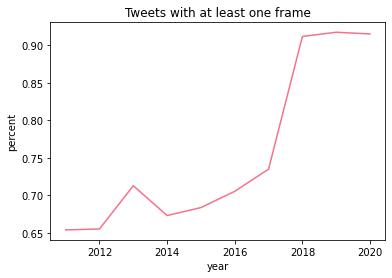

In [35]:
sns.lineplot(x='year',y='percent',data=coverage_year)
plt.title('Tweets with at least one frame')

Text(0.5, 1.0, 'Tweets with at least one frame')

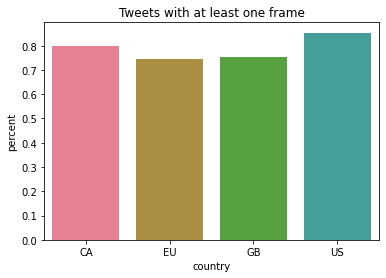

In [36]:
sns.barplot(x='country',y='percent',data=coverage_country)
plt.title('Tweets with at least one frame')

Text(0.5, 1.0, 'Overall Frame Counts')

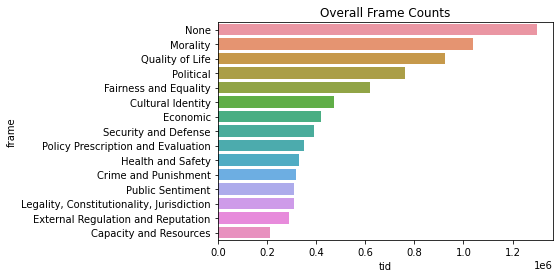

In [16]:
frame_counts = frames_df.groupby('frame').count().sort_values(by='tid', ascending=False).reset_index()
sns.set_palette('husl')
sns.barplot(x='tid',y='frame',data=frame_counts)
plt.title('Overall Frame Counts')

In [5]:
country_counts = frames_df.groupby(['country','frame']).agg({'tid':'count'})
country_percents = country_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
country_percents = country_percents.rename(columns={'tid':'percent'})

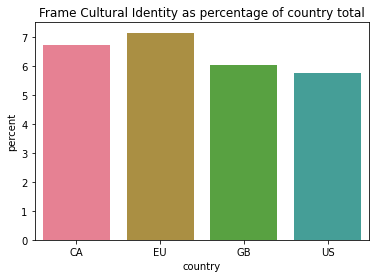

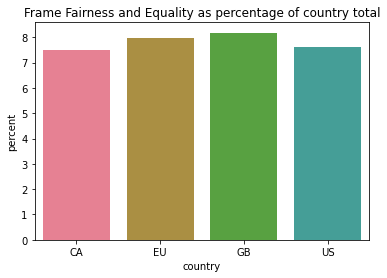

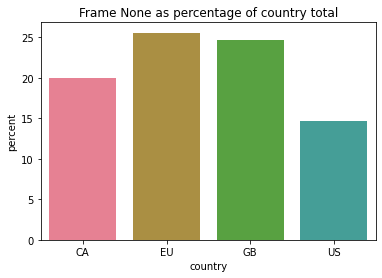

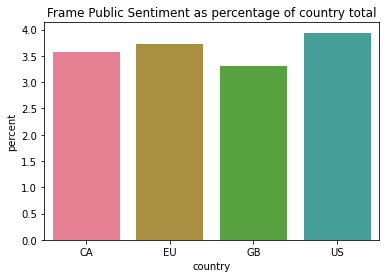

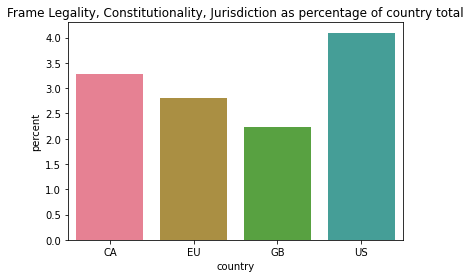

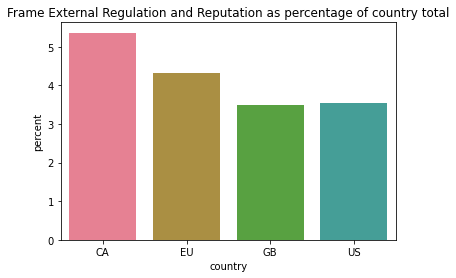

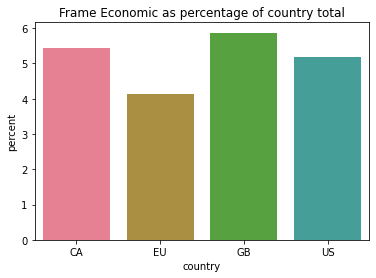

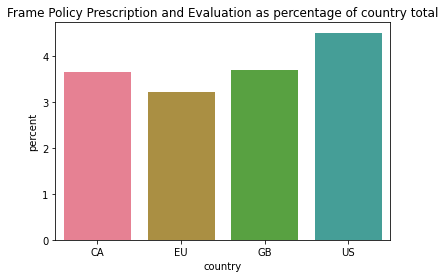

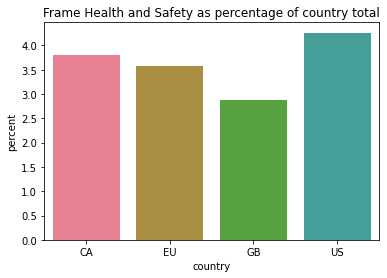

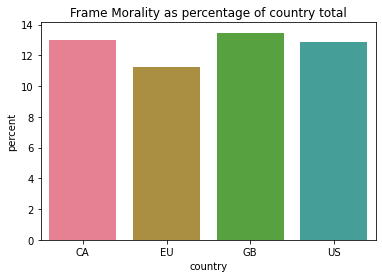

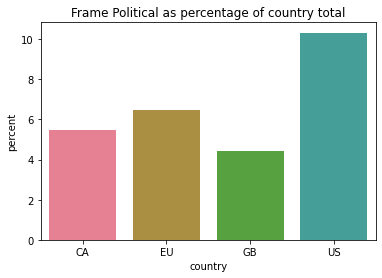

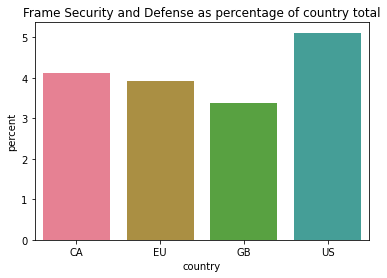

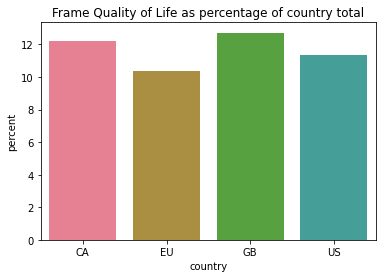

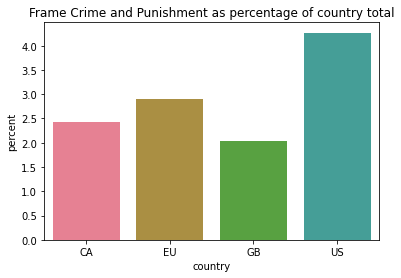

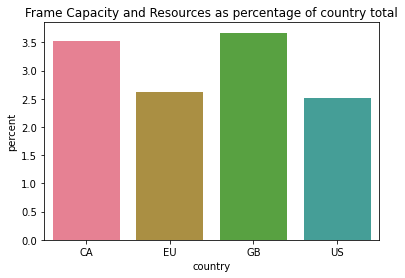

In [49]:
for frame in list(set(country_percents['frame'])):
    subset = country_percents[country_percents['frame']==frame]
    plt.figure()
    sns.barplot(x='country',y='percent',data=subset)
    plt.title(f'Frame {frame} as percentage of country total')

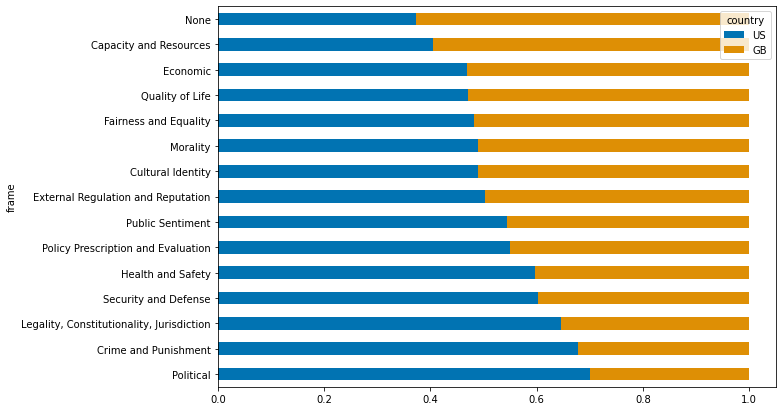

In [10]:
pivot_df = country_percents.pivot(index='frame', columns='country', values='percent')
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)
#pivot_df = pivot_df[['US', 'CA', 'EU', 'GB']].sort_values(by='US', ascending=False)
pivot_df = pivot_df[['US', 'GB']].sort_values(by='US', ascending=False)
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0).sort_values(by='US', ascending=False)

sns.set_palette('colorblind')
pivot_df.plot.barh(stacked=True,figsize=(10,7))

In [138]:
def plot_change_over_time(frames_df,country='all'):
    df = frames_df.copy()
    if country != 'all':
        df = df[df['country']==country]
    df = df[df['frame']!='None'].groupby('year')['frame'].apply(lambda x: x.value_counts(normalize=True)).reset_index()
    df = df.rename(columns={'frame':'percent','level_1':'frame'})
    df = df.pivot(index='year', columns='frame', values='percent')
    ax = df.plot.area()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1, 1))

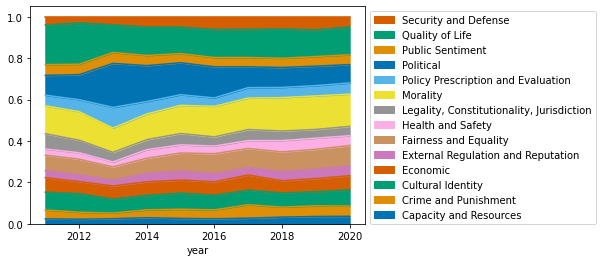

In [139]:
plot_change_over_time(frames_df)

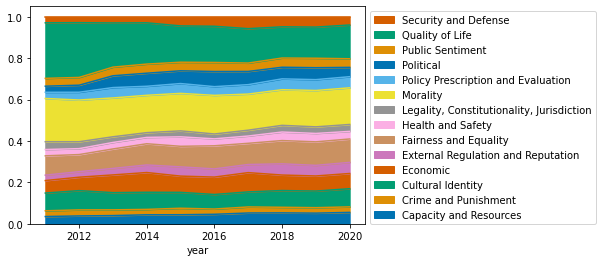

In [141]:
plot_change_over_time(frames_df,country='GB')

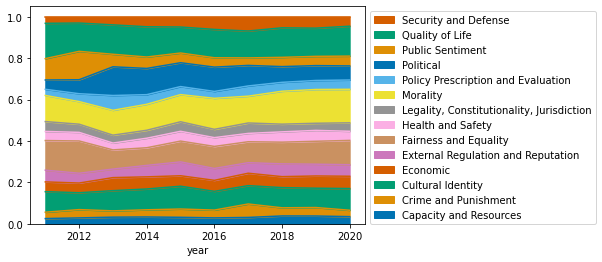

In [142]:
plot_change_over_time(frames_df,country='EU')

Text(0.5, 1.0, 'Average ideology score for each frame (higher = more conservative)')

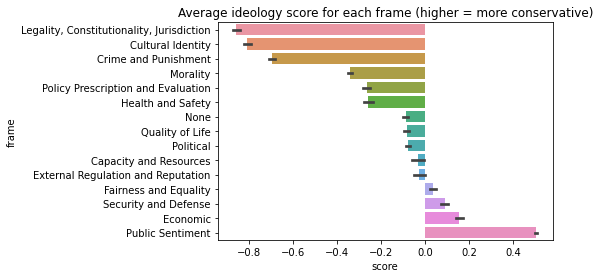

In [164]:
sns.set_palette('husl')
sorted_ideology = combined_df.groupby('frame').mean().sort_values(by='score').reset_index()['frame']
sns.barplot(x='score',y='frame',data=combined_df,order=sorted_ideology)
plt.title('Average ideology score for each frame (higher = more conservative)')

Text(0.5, 1.0, 'Average ideology per year (more conservative = higher)')

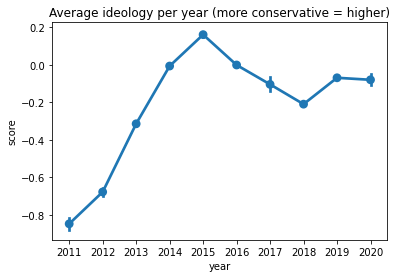

In [8]:
sns.pointplot(x='year',y='score',data=combined_df)
plt.title('Average ideology per year (more conservative = higher)')

In [166]:
def frame_ideology_change(df,frame):
    subset = df[df['frame']==frame]
    sns.pointplot(x='year',y='score',data=subset)

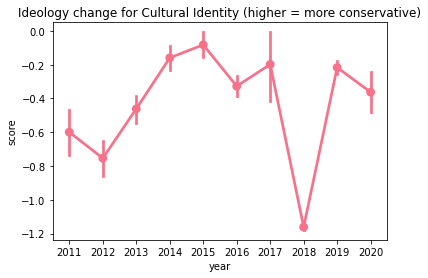

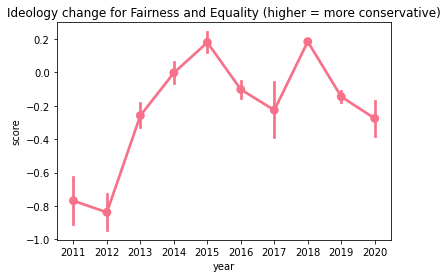

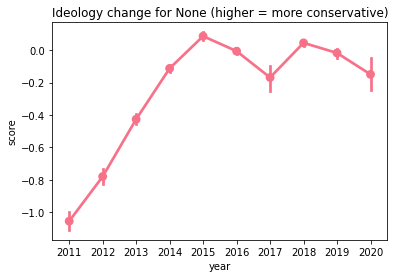

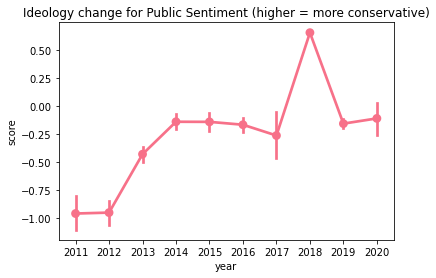

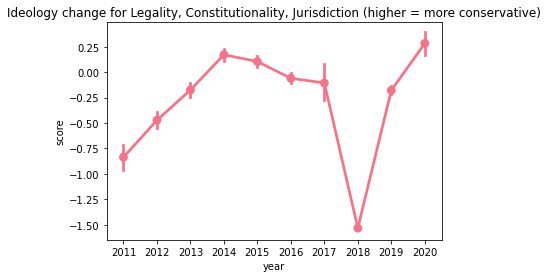

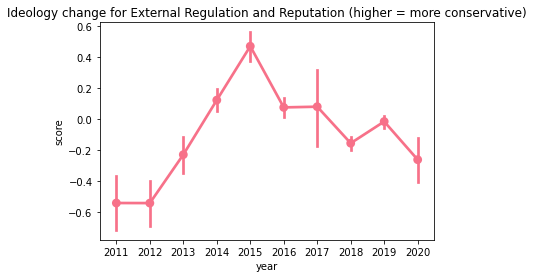

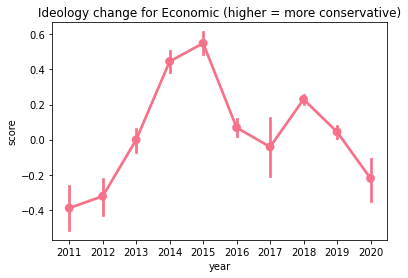

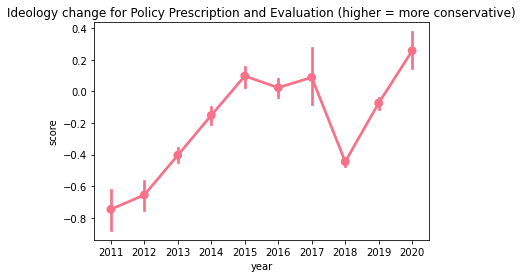

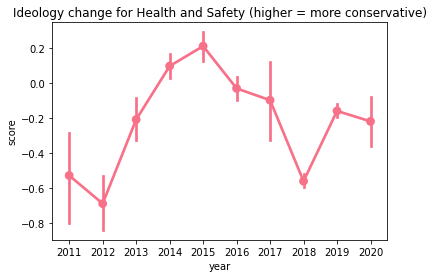

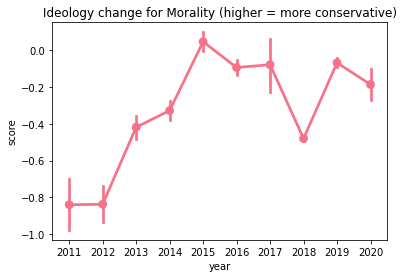

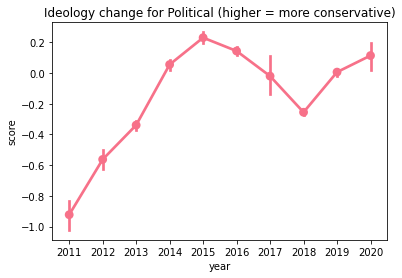

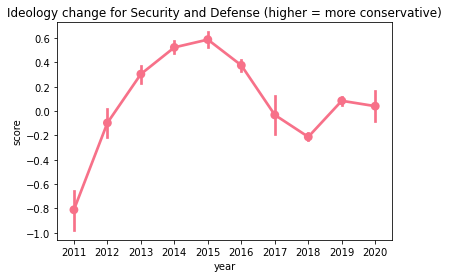

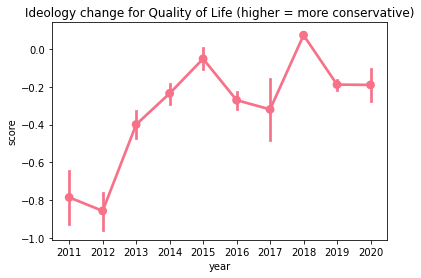

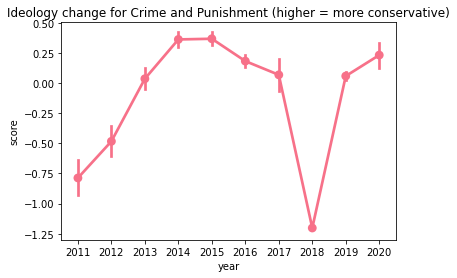

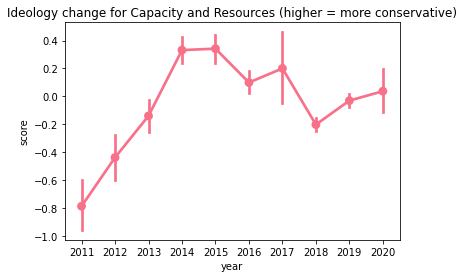

In [168]:
for frame in list(set(combined_df['frame'])):
    plt.figure()
    frame_ideology_change(combined_df,frame)
    plt.title(f'Ideology change for {frame} (higher = more conservative)')

In [169]:
sns.pointplot()
sns.title('Ideo')

,year,country,tid,frame,tweet_id,user,score
0,2011,US,129333192892223488,Cultural Identity,129333192892223488,pwolgin,-1.29
1,2011,US,129333192892223488,Fairness and Equality,129333192892223488,pwolgin,-1.29
2,2011,US,95725258404929536,Political,95725258404929536,zeitgeist2o12,0.91
3,2011,US,117267442731991040,None,117267442731991040,BackOnTrackUSA,1.00
4,2011,US,126125439273025536,None,126125439273025536,marcylauren,-2.46
...,...,...,...,...,...,...,...
734083,2020,US,1217130558117027840,None,1217130558117027840,vdare,1.07
734084,2020,US,1224046794713260034,None,1224046794713260034,aalope2001,0.04
734085,2020,US,1219976391300501505,Quality of Life,1219976391300501505,ultrascanhumint,-0.42
734086,2020,US,1219976391300501505,Health and Safety,1219976391300501505,ultrascanhumint,-0.42
